# **Keras Reression Code Along Part 1**
In this we will predict the price of a house this is why we are using regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


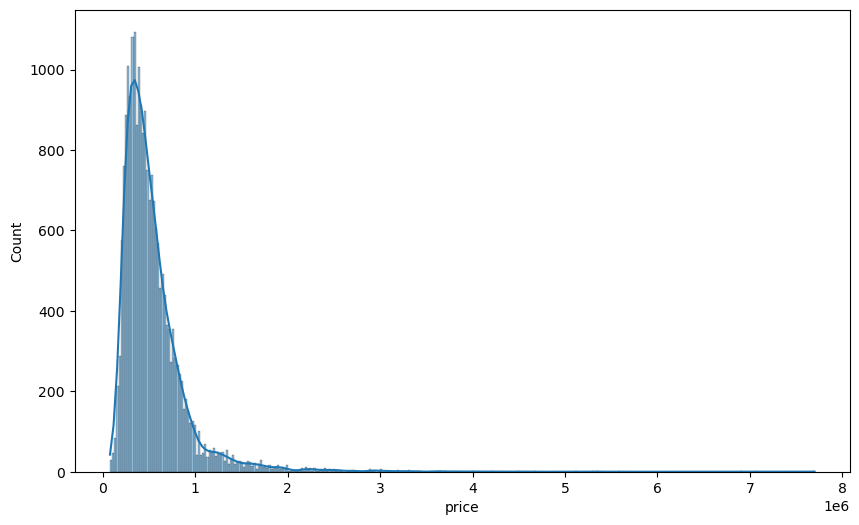

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<Axes: xlabel='bedrooms', ylabel='count'>

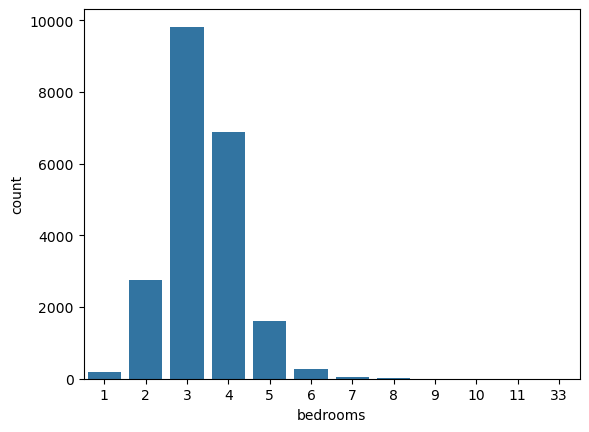

In [8]:
sns.countplot(x='bedrooms', data=df)

In [9]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

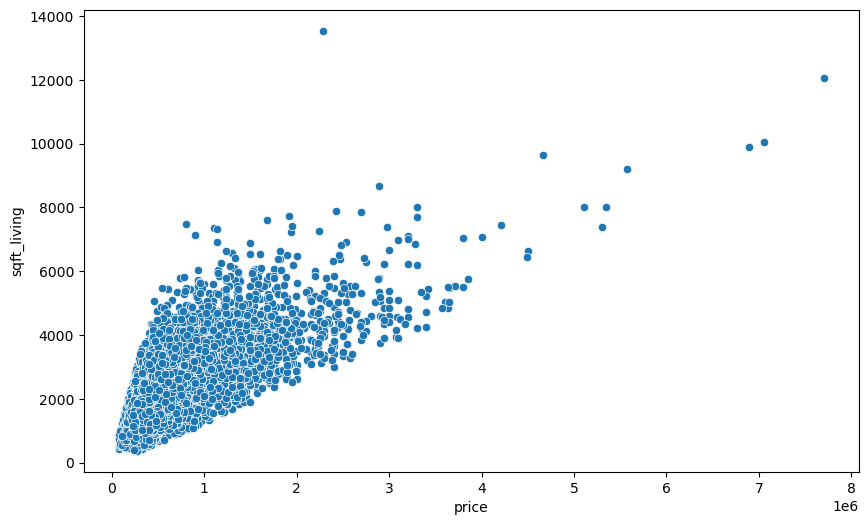

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='sqft_living', data=df)

C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_19896\1195913510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette='winter')


<Axes: xlabel='bedrooms', ylabel='price'>

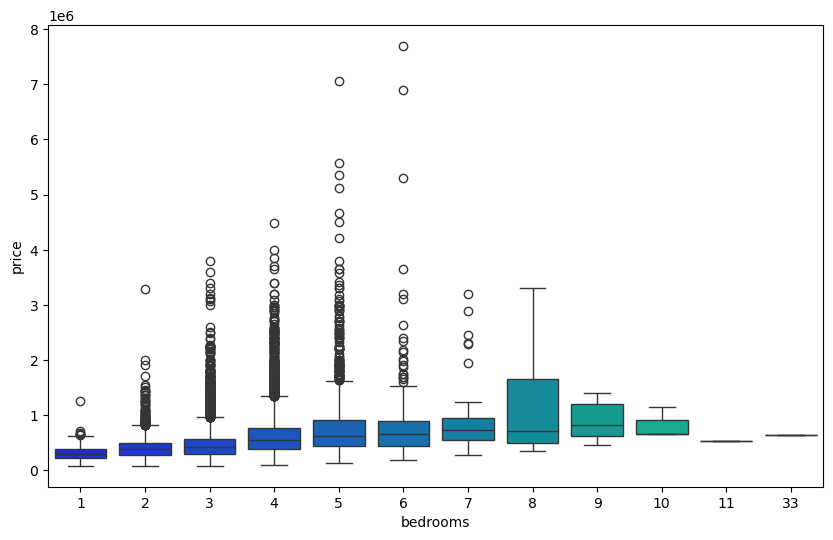

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='winter')

<Axes: xlabel='price', ylabel='long'>

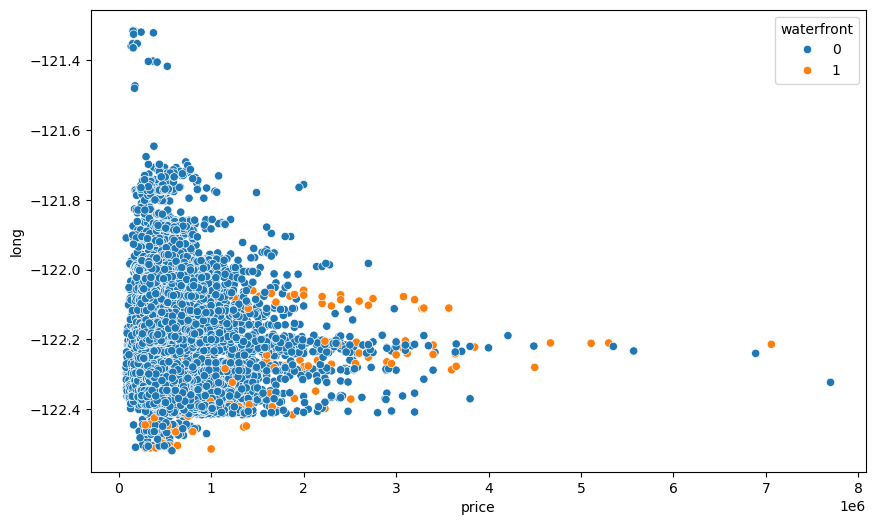

In [12]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='price', y='long', data=df, hue='waterfront')

<Axes: xlabel='price', ylabel='lat'>

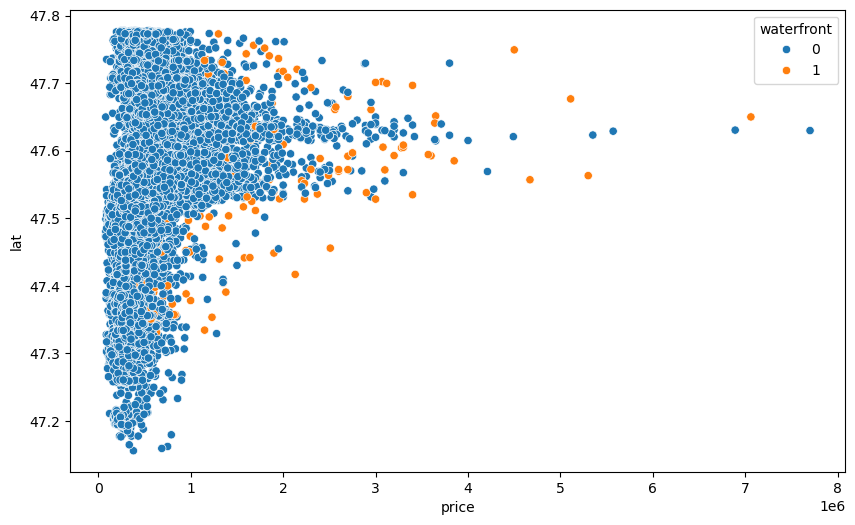

In [13]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='price', y='lat', data=df, hue='waterfront')

<Axes: xlabel='long', ylabel='lat'>

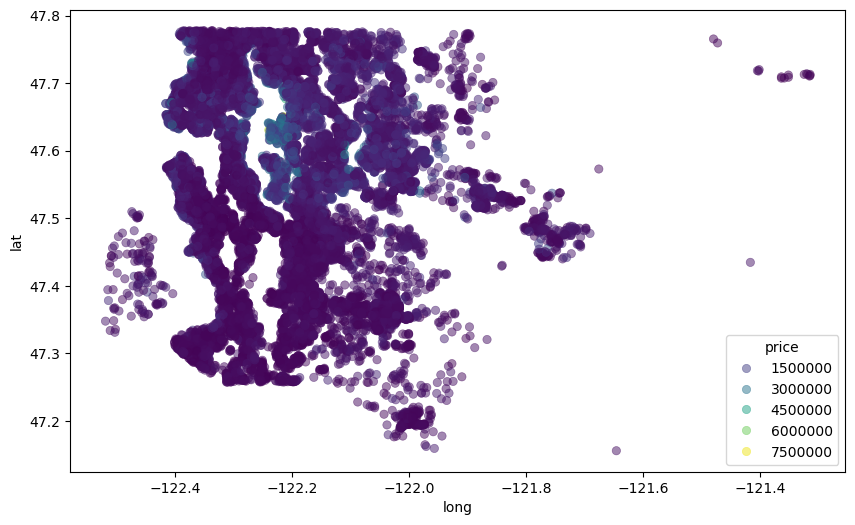

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=df, hue='price',palette='viridis', edgecolor=None, alpha=0.5)

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [17]:
non_top_1_perc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.138100e+04,2.138100e+04,21381.000000,21381.000000,21381.000000,2.138100e+04,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000,21381.000000
mean,4.586699e+09,5.183675e+05,3.363313,2.098592,2051.004256,1.498522e+04,1.490319,0.005332,0.216267,3.408634,7.627379,1766.488144,284.516112,1970.985221,82.329311,98078.092138,47.559500,-122.213741,1971.711613,12686.271222
std,2.877510e+09,2.849428e+05,0.920045,0.745745,861.142315,4.097016e+04,0.538942,0.072826,0.729313,0.649342,1.133104,791.302258,430.493955,29.309309,396.926967,53.479586,0.139035,0.141118,667.936407,27172.880068
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469200,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.576000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.322910e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.054500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10020.000000
max,9.900000e+09,1.970000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


Text(0.5, 0, 'Longitude')

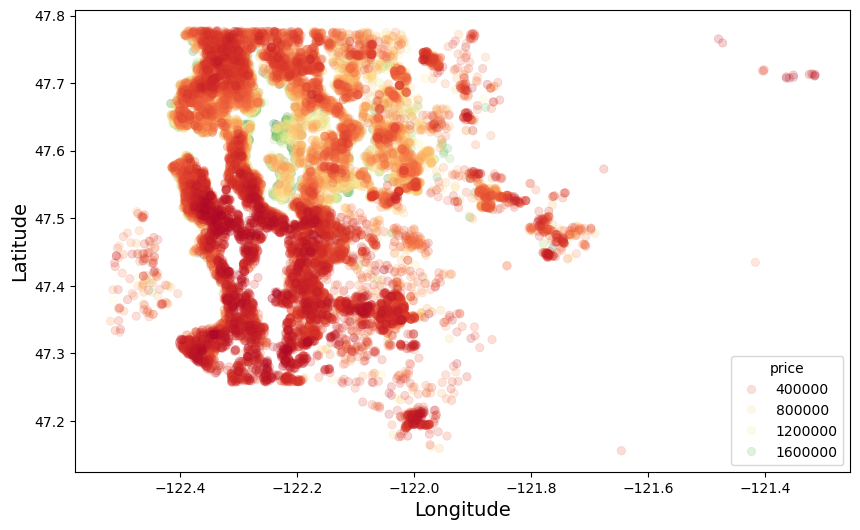

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price',palette='RdYlGn', edgecolor=None, alpha=0.2)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)

C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_19896\2508582578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='waterfront', y='price', data=df, palette='winter')


<Axes: xlabel='waterfront', ylabel='price'>

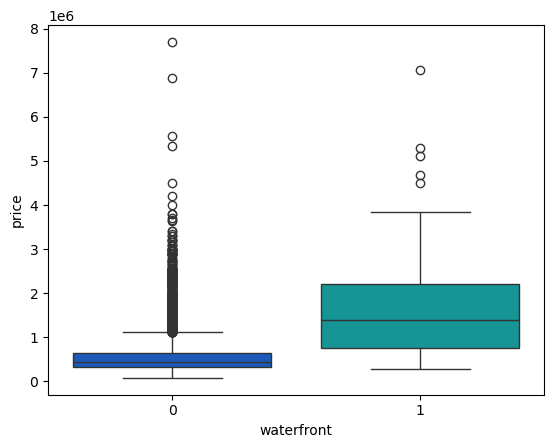

In [19]:
sns.boxplot(x='waterfront', y='price', data=df, palette='winter')

In [20]:
df.drop('id', axis=1, inplace=True)

In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_19896\867940058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='price', data=df, palette='summer')


<Axes: xlabel='month', ylabel='price'>

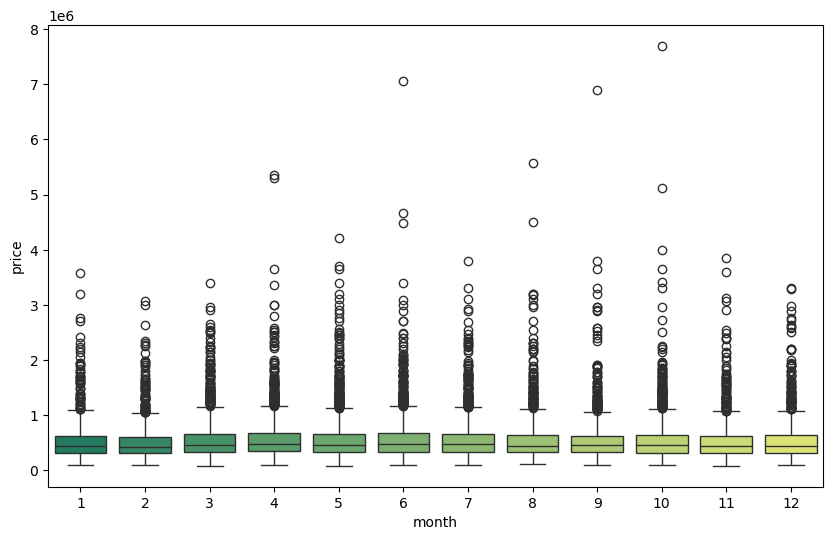

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df, palette='summer')

<Axes: xlabel='month'>

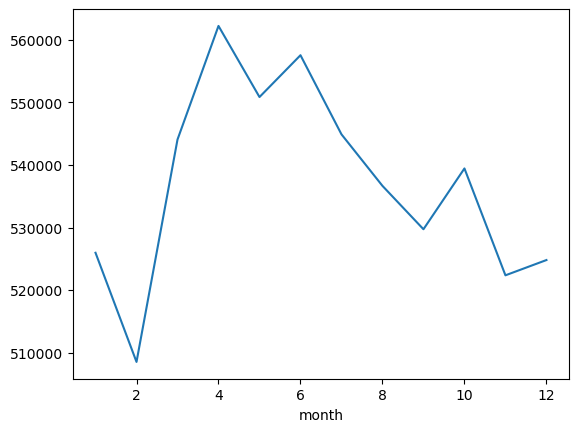

In [27]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

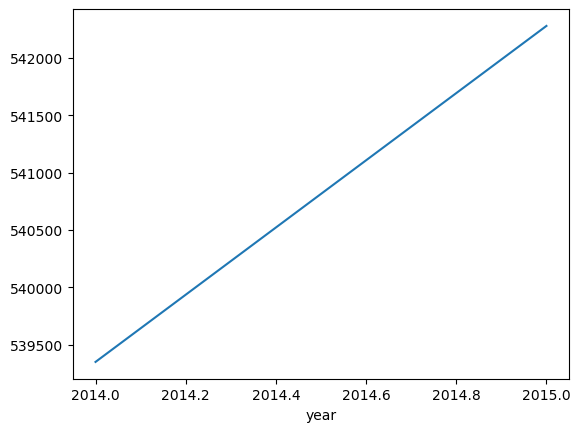

In [28]:
df.groupby('year').mean()['price'].plot()

In [29]:
df = df.drop('date', axis=1)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [31]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [32]:
df = df.drop('zipcode', axis=1)

In [33]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [34]:
"""

KERAS PART 2


"""

'\n\nKERAS PART 2\n\n\n'

In [35]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Dense

In [44]:
X_train.shape

(15117, 19)

In [45]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [46]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test),batch_size=128)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 430245019648.0000 - val_loss: 418945957888.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 429349502976.0000 - val_loss: 415460524032.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 412923494400.0000 - val_loss: 375464787968.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324526800896.0000 - val_loss: 233554313216.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 163379986432.0000 - val_loss: 105122914304.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101145370624.0000 - val_loss: 95267291136.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97589657600.0000 - val_loss: 93620944896.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95819333632.0000 - val_loss: 91971166208.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94034018304.0000 - val_loss: 90255204352.0000
Epoch 10/400
119/119 ━━━━━

In [47]:
losses = pd.DataFrame(model.history.history)

In [48]:
losses.head()

,loss,val_loss
0,4.302450e+11,4.189460e+11
1,4.293495e+11,4.154605e+11
2,4.129235e+11,3.754648e+11
3,3.245268e+11,2.335543e+11
4,1.633800e+11,1.051229e+11


<Axes: >

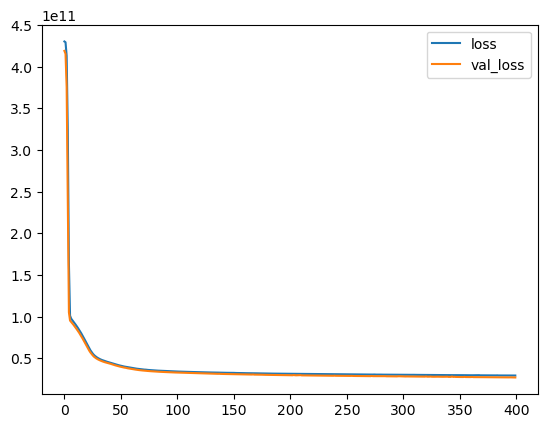

In [49]:
losses.plot()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [51]:
predictions = model.predict(X_test)

  1/203 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
np.sqrt(mean_squared_error(y_test, predictions))

np.float64(164197.4674423943)

In [53]:
mean_absolute_error(y_test, predictions)

102071.73942599827

In [54]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [55]:
explained_variance_score(y_test, predictions)

0.7967034004045179

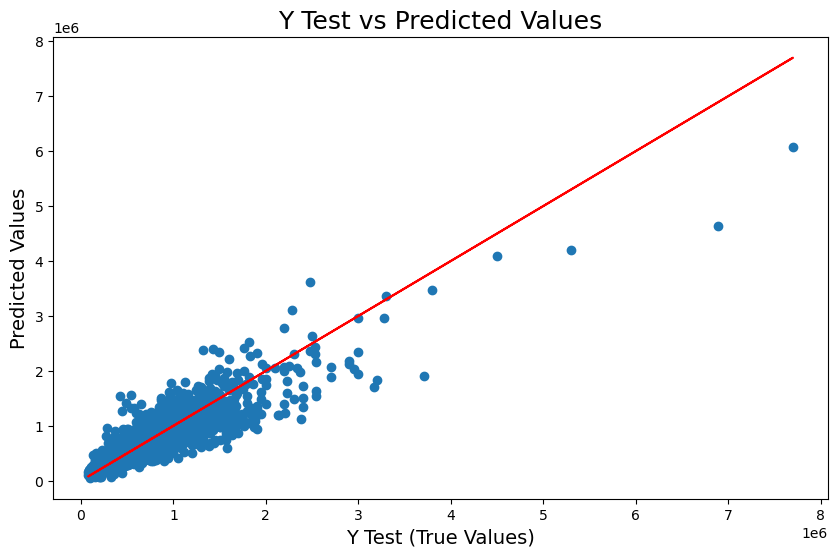

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Y Test vs Predicted Values', fontsize=18)
plt.plot(y_test, y_test, 'r')

In [57]:
df.drop('price', axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [58]:
single_house = df.drop('price', axis=1).iloc[0].values.reshape(-1, 19)

In [59]:
single_house_scaled = scaler.transform(single_house)

In [60]:
model.predict(single_house_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[290678.75]], dtype=float32)

# **Cancer Data**

In [61]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [62]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_19896\341557968.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='benign_0__mal_1', data=df, palette='Set1')


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

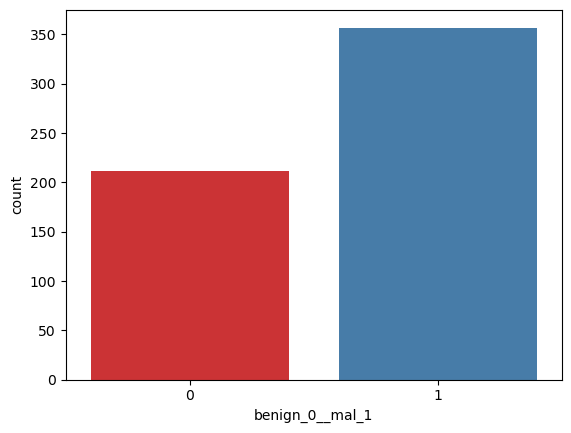

In [66]:
sns.countplot(x='benign_0__mal_1', data=df, palette='Set1')

<Axes: >

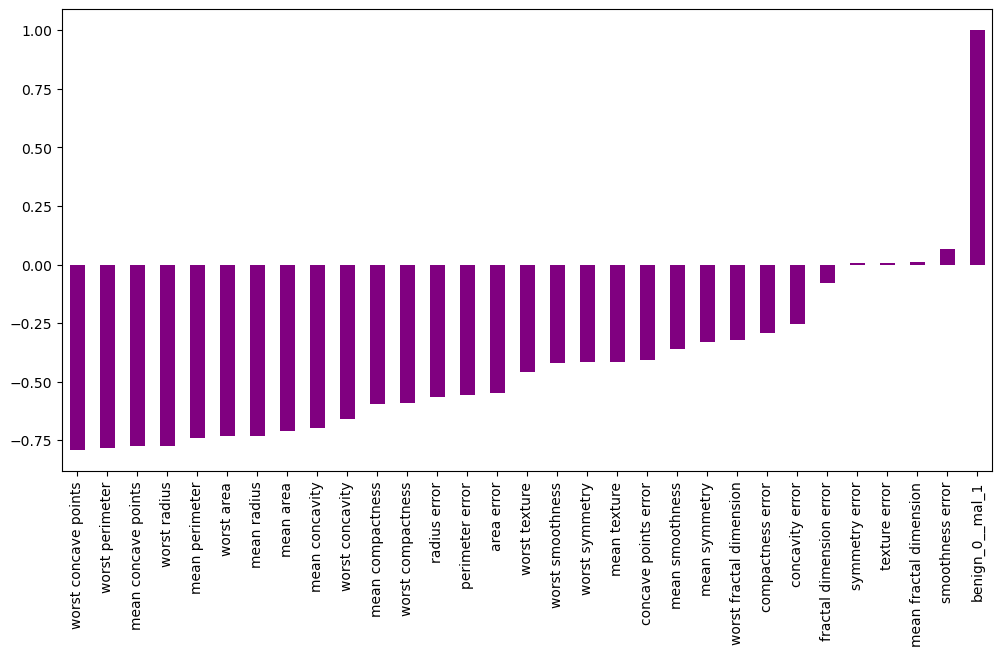

In [69]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar', figsize=(12,6), color='purple')

<Axes: >

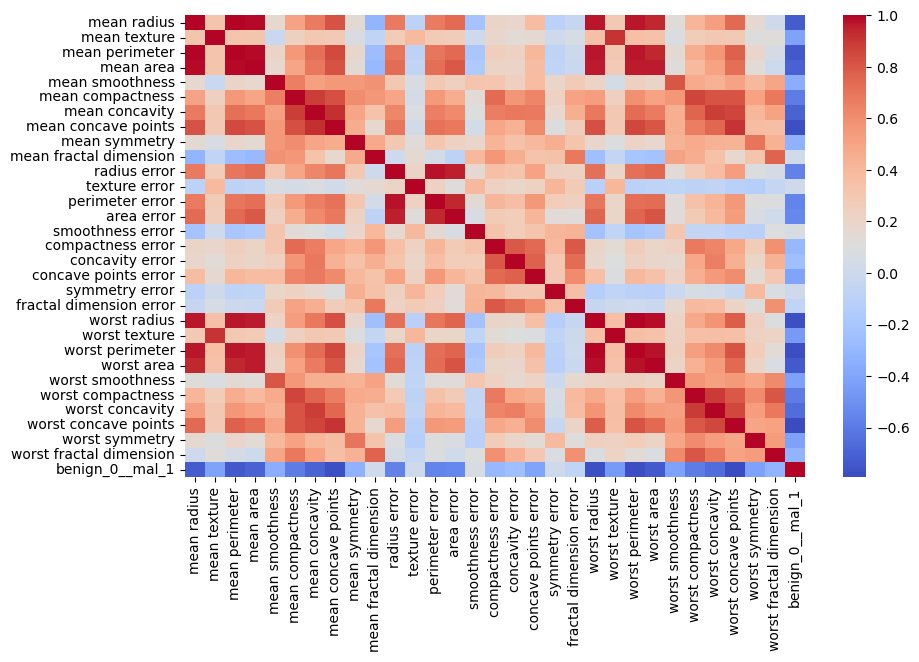

In [73]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')



In [74]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [83]:
X_test

array([[0.26317335, 0.29861346, 0.2461044 , ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.34536915, 0.21203923, 0.32136119, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.29008269, 0.22387555, 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.51954597, 0.46060196, 0.52553979, ..., 0.68591065, 0.14508181,
        0.44182081],
       [0.22696805, 0.28643896, 0.22772692, ..., 0.48659794, 0.21584861,
        0.24701561],
       [0.41680121, 0.38451133, 0.41303892, ..., 0.73333333, 0.28346146,
        0.32638069]])

In [84]:
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [87]:
X_train.shape

(426, 30)

In [120]:
model = Sequential()

In [91]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [92]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.6979 - val_loss: 0.6943
Epoch 2/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6931 - val_loss: 0.6909
Epoch 3/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6898 - val_loss: 0.6882
Epoch 4/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6866 - val_loss: 0.6857
Epoch 5/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6838 - val_loss: 0.6836
Epoch 6/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6816 - val_loss: 0.6814
Epoch 7/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6789 - val_loss: 0.6794
Epoch 8/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6763 - val_loss: 0.6775
Epoch 9/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6742 - val_loss: 0.6757
Epoch 10/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6721 - val_loss: 0.6740
Epoch 11/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6700 - val_loss: 0.6725
Epoch 12/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6682 - val_l

<Axes: >

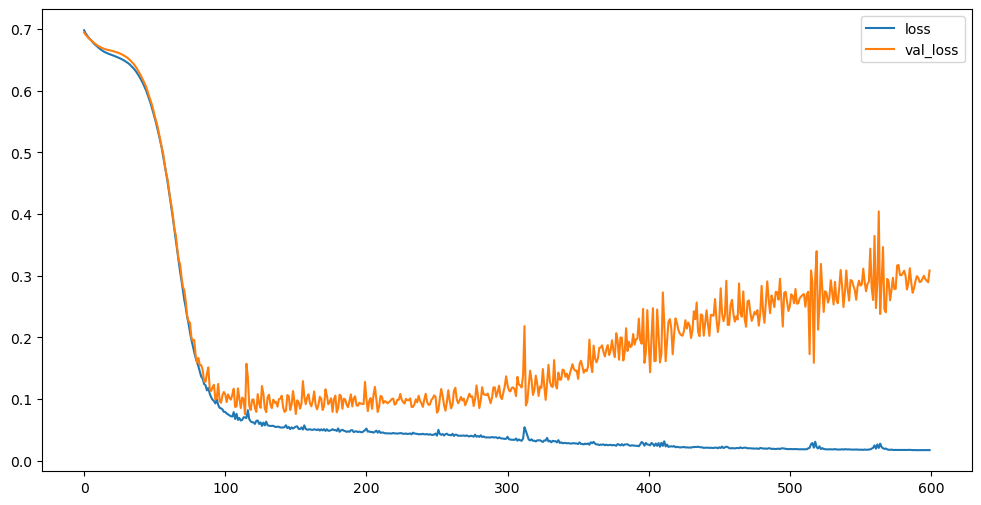

In [95]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(12, 6)) # THIS WILL OVERFIT, SO WE NEED TO ADD DROPOUT LAYERS

In [104]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [106]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [107]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop])

Epoch 1/600


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.6827 - val_loss: 0.6719
Epoch 2/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6639 - val_loss: 0.6553
Epoch 3/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6463 - val_loss: 0.6397
Epoch 4/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6298 - val_loss: 0.6237
Epoch 5/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6130 - val_loss: 0.6071
Epoch 6/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5957 - val_loss: 0.5897
Epoch 7/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5776 - val_loss: 0.5712
Epoch 8/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5589 - val_loss: 0.5523
Epoch 9/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5401 - val_loss: 0.5334
Epoch 10/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5226 - val_loss: 0.5152
Epoch 11/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5051 - val_loss: 0.4968
Epoch 12/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4873 - val_loss: 0.4784


<Axes: >

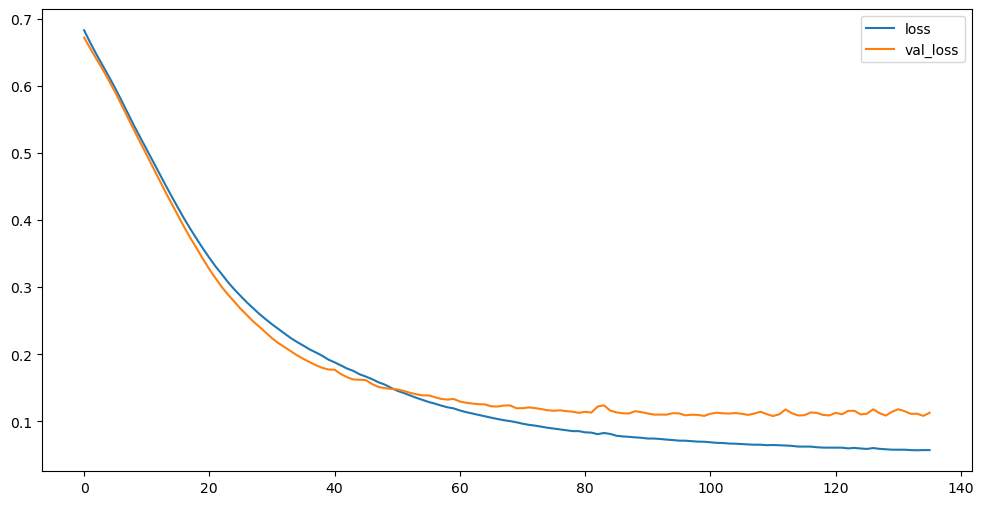

In [109]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot(figsize=(12,6))


In [114]:
from tensorflow.keras.layers import Dropout

In [121]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [122]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop])

Epoch 1/600


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.7016 - val_loss: 0.6917
Epoch 2/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6967 - val_loss: 0.6835
Epoch 3/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7049 - val_loss: 0.6758
Epoch 4/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7049 - val_loss: 0.6691
Epoch 5/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6930 - val_loss: 0.6621
Epoch 6/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6778 - val_loss: 0.6553
Epoch 7/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6758 - val_loss: 0.6491
Epoch 8/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6594 - val_loss: 0.6422
Epoch 9/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6501 - val_loss: 0.6345
Epoch 10/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6387 - val_loss: 0.6262
Epoch 11/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6485 - val_loss: 0.6181
Epoch 12/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6454 - val_loss: 0.6091


<Axes: >

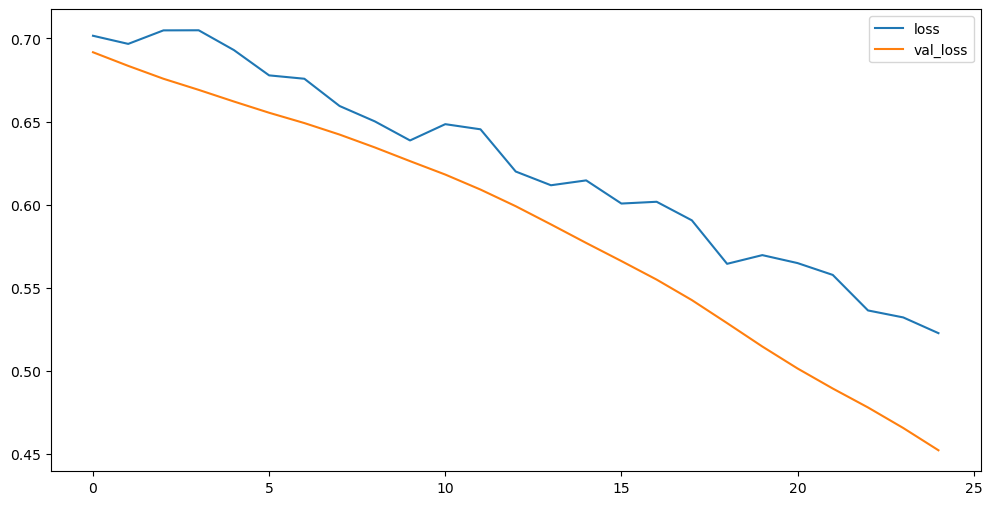

In [123]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot(figsize=(12,6))


In [124]:
model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'